In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
287,708421833,Existing Customer,45,F,4,Graduate,Single,Less than $40K,Blue,36,...,3342.0,2517,825.0,0.771,1139,30,0.765,0.753,0.000189,0.999810
1966,709858533,Existing Customer,29,M,2,Graduate,Divorced,Less than $40K,Blue,20,...,2462.0,2021,441.0,0.966,2320,57,0.676,0.821,0.000055,0.999940
8554,719590458,Attrited Customer,44,F,4,Graduate,Married,Less than $40K,Blue,36,...,1905.0,0,1905.0,0.845,3120,46,0.586,0.000,0.996860,0.003141
8910,711830433,Existing Customer,44,F,3,College,Single,Less than $40K,Blue,32,...,7926.0,1051,6875.0,0.729,7677,87,0.554,0.133,0.000069,0.999930
3137,778422933,Existing Customer,42,F,1,Unknown,Single,Unknown,Blue,22,...,19127.0,985,18142.0,0.966,3323,56,0.931,0.051,0.000117,0.999880
3291,756397458,Existing Customer,54,F,1,Graduate,Single,Less than $40K,Silver,47,...,12873.0,0,12873.0,1.005,3170,70,0.842,0.000,0.000438,0.999560
6566,714523383,Existing Customer,43,F,3,Graduate,Single,$40K - $60K,Blue,33,...,2900.0,2122,778.0,0.631,4656,59,1.458,0.732,0.000118,0.999880
4929,770917608,Existing Customer,42,F,1,Uneducated,Married,Less than $40K,Blue,29,...,2756.0,1911,845.0,0.774,4656,62,0.879,0.693,0.000210,0.999790
74,789973308,Existing Customer,44,M,1,College,Single,$60K - $80K,Blue,35,...,24312.0,1932,22380.0,1.312,1341,24,1.182,0.079,0.000276,0.999720
7448,708397008,Existing Customer,54,F,4,Graduate,Married,Unknown,Blue,43,...,3805.0,821,2984.0,0.807,4326,67,0.811,0.216,0.000201,0.999800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.drop([
        'CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
    axis=1,
    inplace=True,
)


In [7]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
df.duplicated().sum()

np.int64(0)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


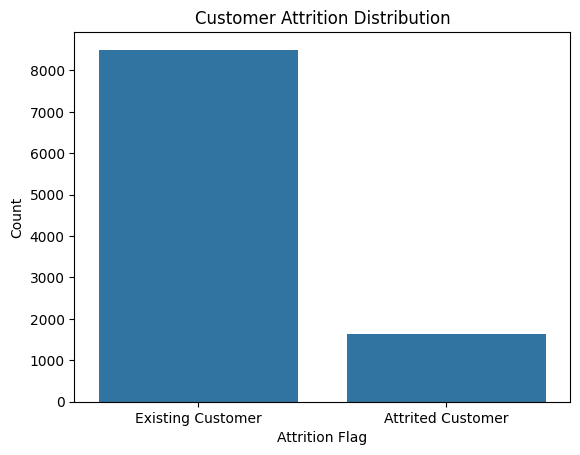

In [10]:
print(df['Attrition_Flag'].value_counts())

sns.countplot(data=df,x='Attrition_Flag')
plt.title('Customer Attrition Distribution')
plt.ylabel('Count')
plt.xlabel('Attrition Flag')
plt.show()


In [11]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [12]:
for col in categorical_cols:
    print(df[col].value_counts())
    print("------------------")

Gender
F    5358
M    4769
Name: count, dtype: int64
------------------
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
------------------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
------------------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
------------------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
------------------


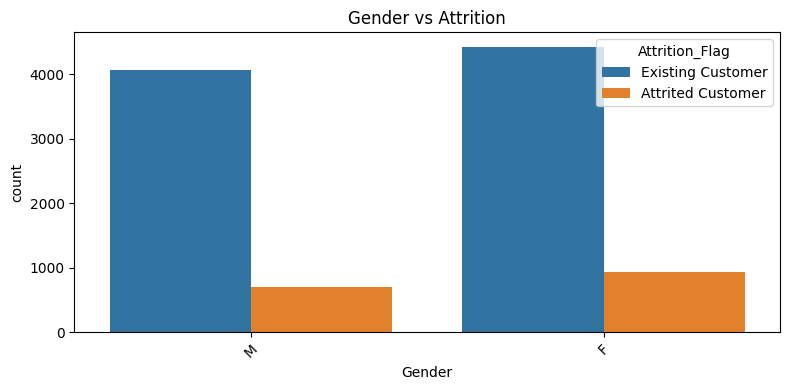

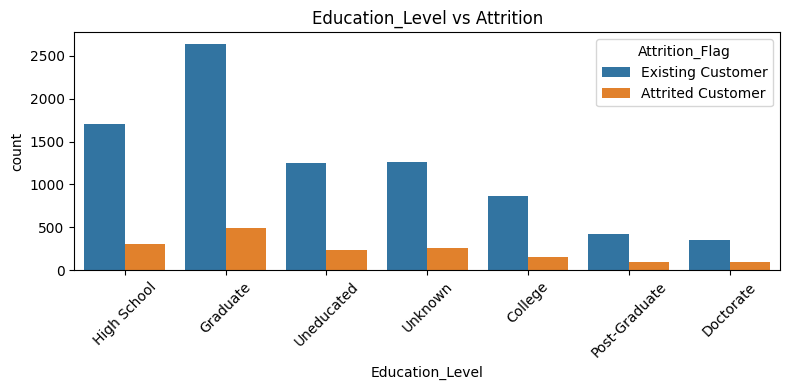

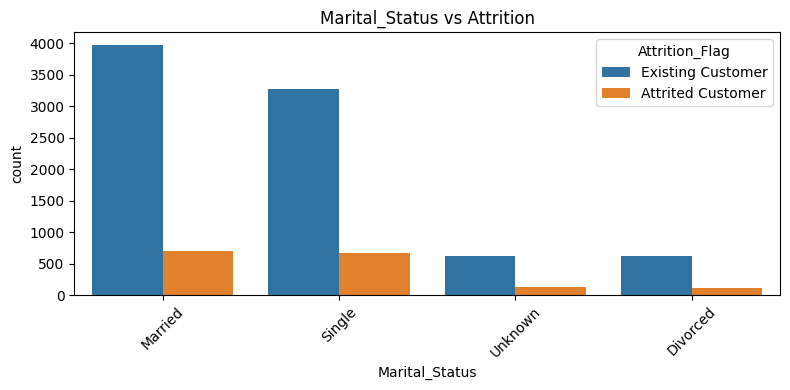

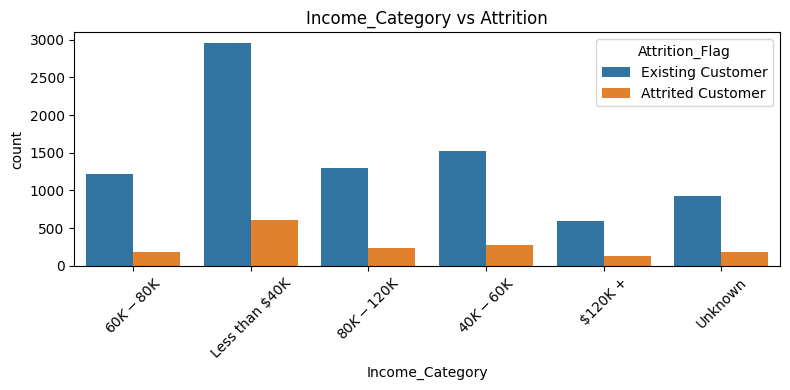

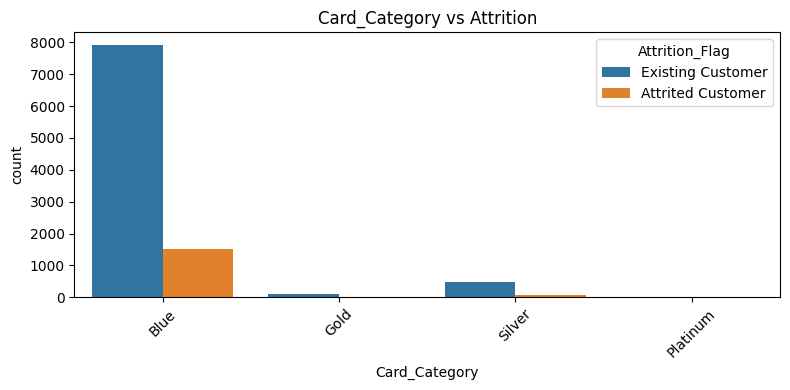

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Attrition_Flag')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

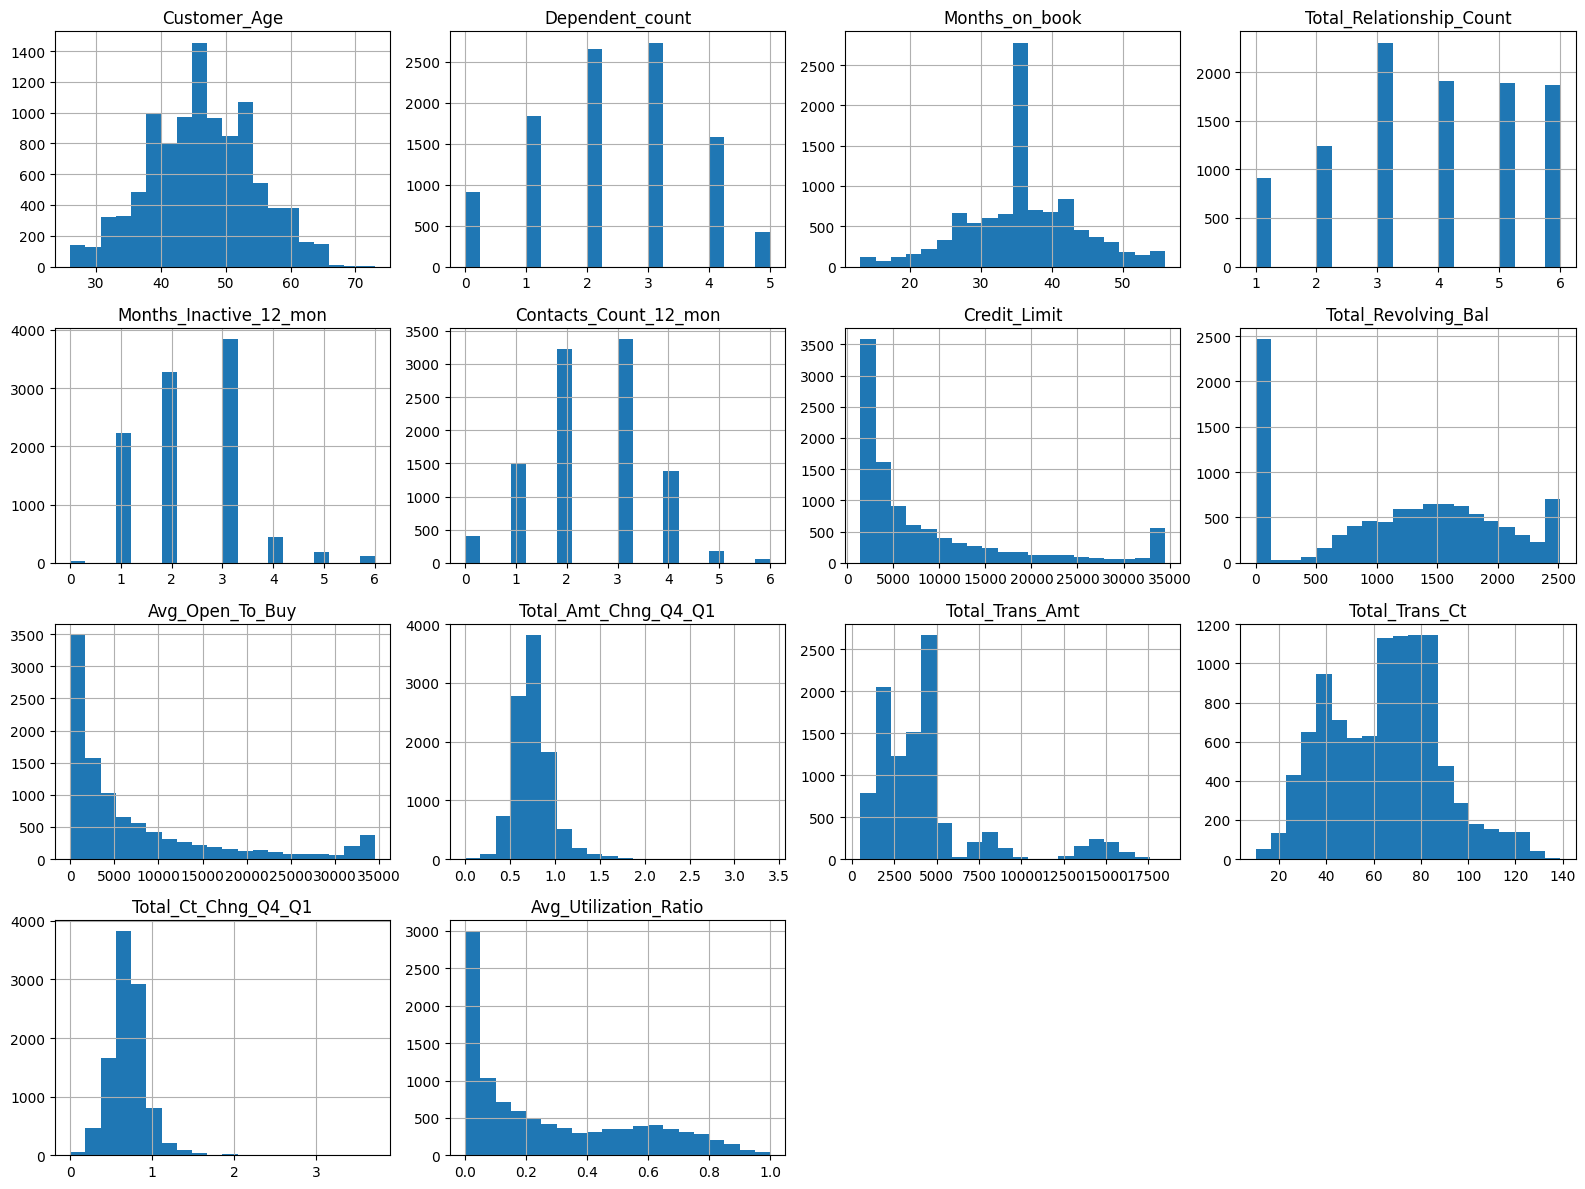

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()


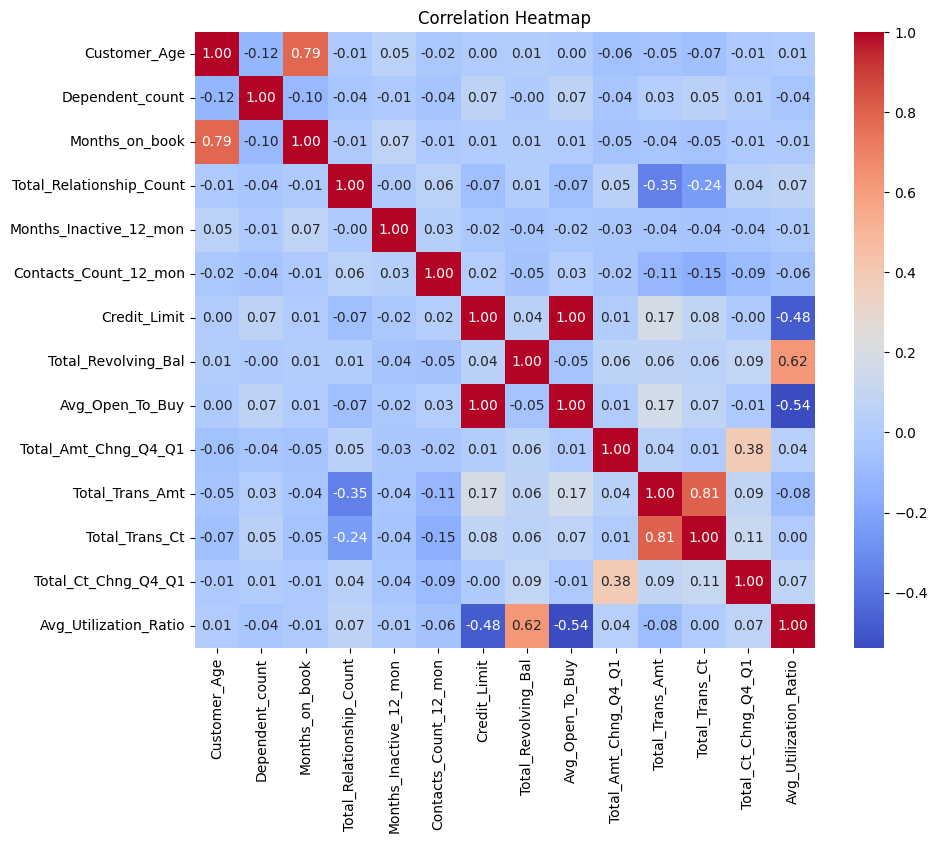

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


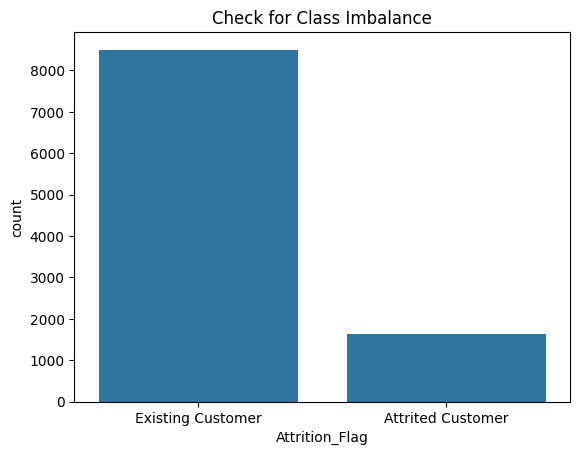

In [18]:
# 0 = Existing, 1 = Attrited
df['Attrition_Flag'].value_counts()

# Visual again
sns.countplot(x='Attrition_Flag', data=df)
plt.title("Check for Class Imbalance")
plt.show()


In [19]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
y = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
X = df.drop(columns=['Attrition_Flag'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols=X.select_dtypes(include='object').columns.tolist()
numerical_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocessor=ColumnTransformer([
    ('num',StandardScaler(),numerical_cols),
    ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [23]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_train_res, y_train_res=smote.fit_resample(X_train_processed,y_train)


In [24]:
import pandas as pd

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("After SMOTE:")
print(pd.Series(y_train_res).value_counts())


Before SMOTE:
Attrition_Flag
0    6799
1    1302
Name: count, dtype: int64
After SMOTE:
Attrition_Flag
0    6799
1    6799
Name: count, dtype: int64


In [25]:
def evaluate_model(model, x_test, y_test):
    from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {auc:.4f}")
        return auc
    else:
        return None


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1701
           1       0.54      0.80      0.64       325

    accuracy                           0.86      2026
   macro avg       0.75      0.83      0.78      2026
weighted avg       0.89      0.86      0.87      2026

ROC AUC Score: 0.9194


np.float64(0.9194121105232217)

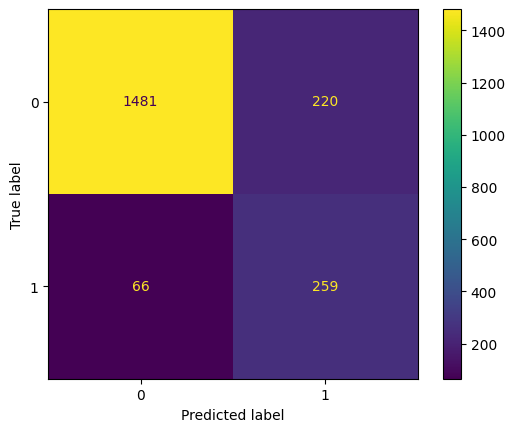

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)

evaluate_model(logreg, X_test_processed, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1701
           1       0.37      0.70      0.49       325

    accuracy                           0.76      2026
   macro avg       0.65      0.74      0.67      2026
weighted avg       0.84      0.76      0.79      2026

ROC AUC Score: 0.7869


np.float64(0.7868566001899335)

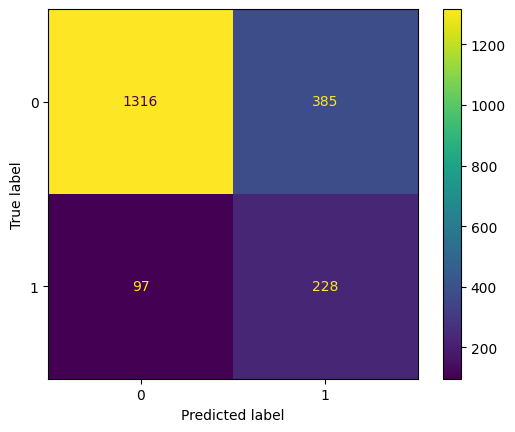

In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

evaluate_model(nb, X_test_processed, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1701
           1       0.56      0.86      0.67       325

    accuracy                           0.87      2026
   macro avg       0.76      0.86      0.80      2026
weighted avg       0.90      0.87      0.88      2026

ROC AUC Score: 0.9174


np.float64(0.9173508795731018)

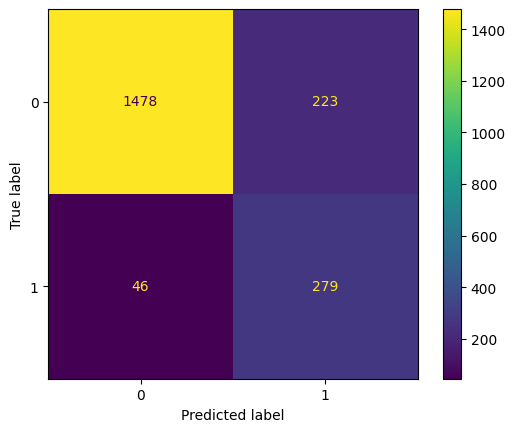

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

evaluate_model(knn, X_test_processed, y_test)

Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1701
           1       0.79      0.78      0.78       325

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

ROC AUC Score: 0.9639


np.float64(0.9639271017048796)

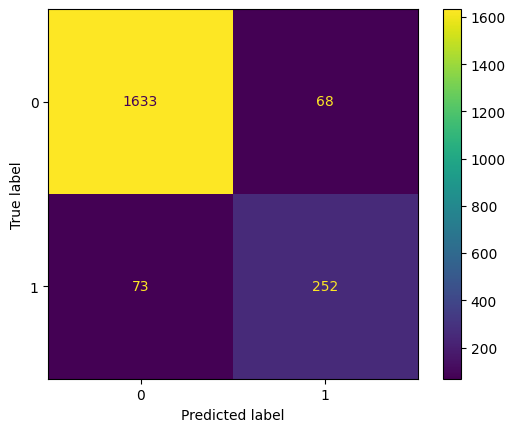

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(probability=True), svc_param, cv=5, scoring='roc_auc', n_jobs=-1)
svc_grid.fit(X_train_res, y_train_res)

print("Best Params:", svc_grid.best_params_)
evaluate_model(svc_grid.best_estimator_, X_test_processed, y_test)


Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1701
           1       0.77      0.82      0.79       325

    accuracy                           0.93      2026
   macro avg       0.87      0.89      0.88      2026
weighted avg       0.93      0.93      0.93      2026

ROC AUC Score: 0.9369


np.float64(0.9368724279835392)

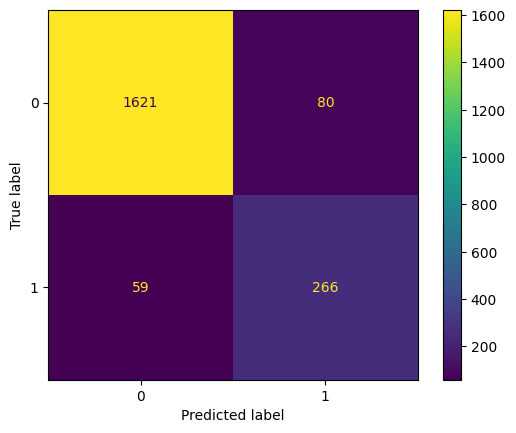

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param, cv=5, scoring='roc_auc', n_jobs=-1)
dt_grid.fit(X_train_res, y_train_res)

print("Best Params:", dt_grid.best_params_)
evaluate_model(dt_grid.best_estimator_, X_test_processed, y_test)


Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1701
           1       0.87      0.84      0.86       325

    accuracy                           0.96      2026
   macro avg       0.92      0.91      0.92      2026
weighted avg       0.95      0.96      0.95      2026

ROC AUC Score: 0.9843


np.float64(0.9843313887758333)

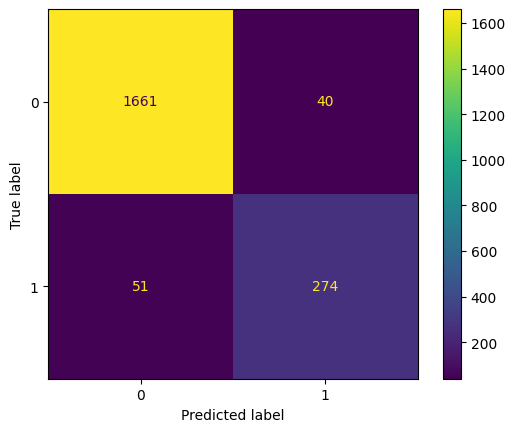

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_param = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_param, cv=5, scoring='roc_auc', n_iter=10, n_jobs=-1, random_state=42)
rf_random.fit(X_train_res, y_train_res)

print("Best Params:", rf_random.best_params_)
evaluate_model(rf_random.best_estimator_, X_test_processed, y_test)


In [33]:
from sklearn.metrics import roc_auc_score

results = {
    'Model': ['LogReg', 'NaiveBayes', 'KNN', 'SVC', 'DecisionTree', 'RandomForest'],
    'ROC_AUC': [
        roc_auc_score(y_test, logreg.predict_proba(X_test_processed)[:,1]),
        roc_auc_score(y_test, nb.predict_proba(X_test_processed)[:,1]),
        roc_auc_score(y_test, knn.predict_proba(X_test_processed)[:,1]),
        roc_auc_score(y_test, svc_grid.best_estimator_.predict_proba(X_test_processed)[:,1]),
        roc_auc_score(y_test, dt_grid.best_estimator_.predict_proba(X_test_processed)[:,1]),
        roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test_processed)[:,1])
    ]
}

import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='ROC_AUC', ascending=False)
print(results_df)


          Model   ROC_AUC
5  RandomForest  0.984331
3           SVC  0.963927
4  DecisionTree  0.936872
0        LogReg  0.919412
2           KNN  0.917351
1    NaiveBayes  0.786857
